# Redes Neuronales con Keras

En este ejercicio, tu objetivo será entrenar modelos de Redes Neuronales utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [1]:
%matplotlib notebook

In [3]:
import rnutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

In [4]:
# para que los resultados sean reproducibles
np.random.seed(4)
tf.random.set_seed(4)

# Entrena un modelo de Redes Neuronales con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?

#### Selección del dataset: descomenta el que quieras usar

In [31]:
# Datasets en 2D
# dataset = "2_clases_simple.csv"
dataset = "6_clases_dificil.csv"
# dataset = "moons.csv"
# dataset = "moons_mis-scaled.csv"

# Dataset con más de 2 dimensiones
# dataset = "iris.csv"
# dataset = "diabetes.csv"

##### Carga del dataset

In [32]:
data = rnutil.load_dataset_numpy(dataset)
x,y  = data[:,0:-1], data[:,-1]

# cantidad de ejemplos y dimension de entrada
n,d_in = x.shape

# calcula la cantidad de clases
classes = int(y.max()+1)

print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i] = (x[:,i] - x[:,i].mean()) / x[:,i].std()

Loading file from package rnutil (/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/rnutil/data)...
Done


Información del conjunto de datos:

Ejemplos: 1500

Variables de entrada: 2

Cantidad de clases: 6

#### Creación y entrenamiento del modelo

<IPython.core.display.Javascript object>


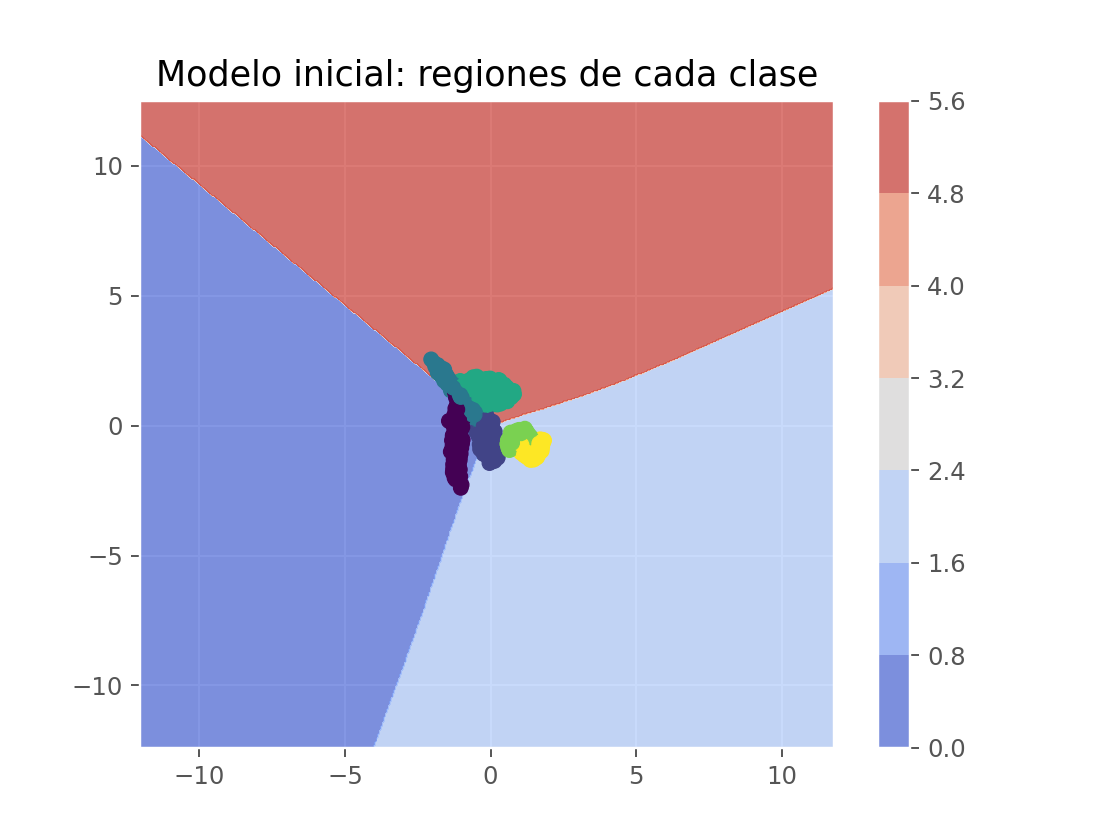

7454/7454 [==============================] - 3s 378us/step


Entrenando....

<IPython.core.display.Javascript object>


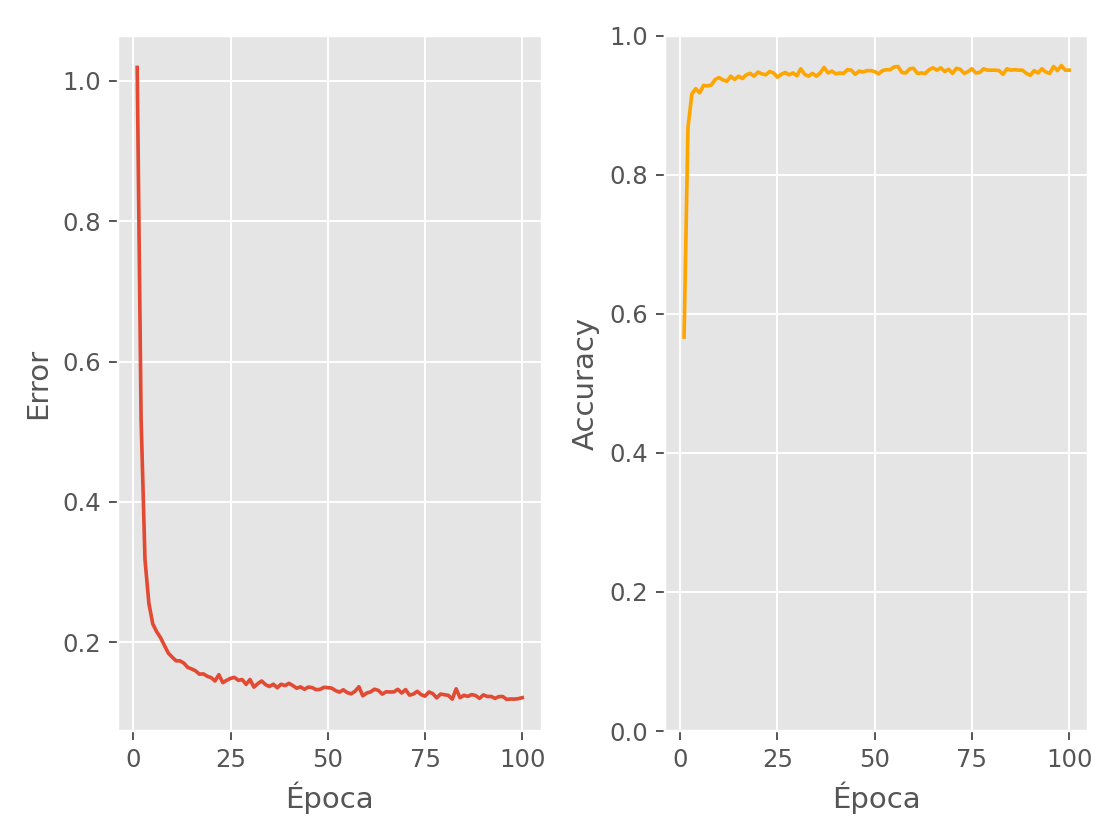

<IPython.core.display.Javascript object>


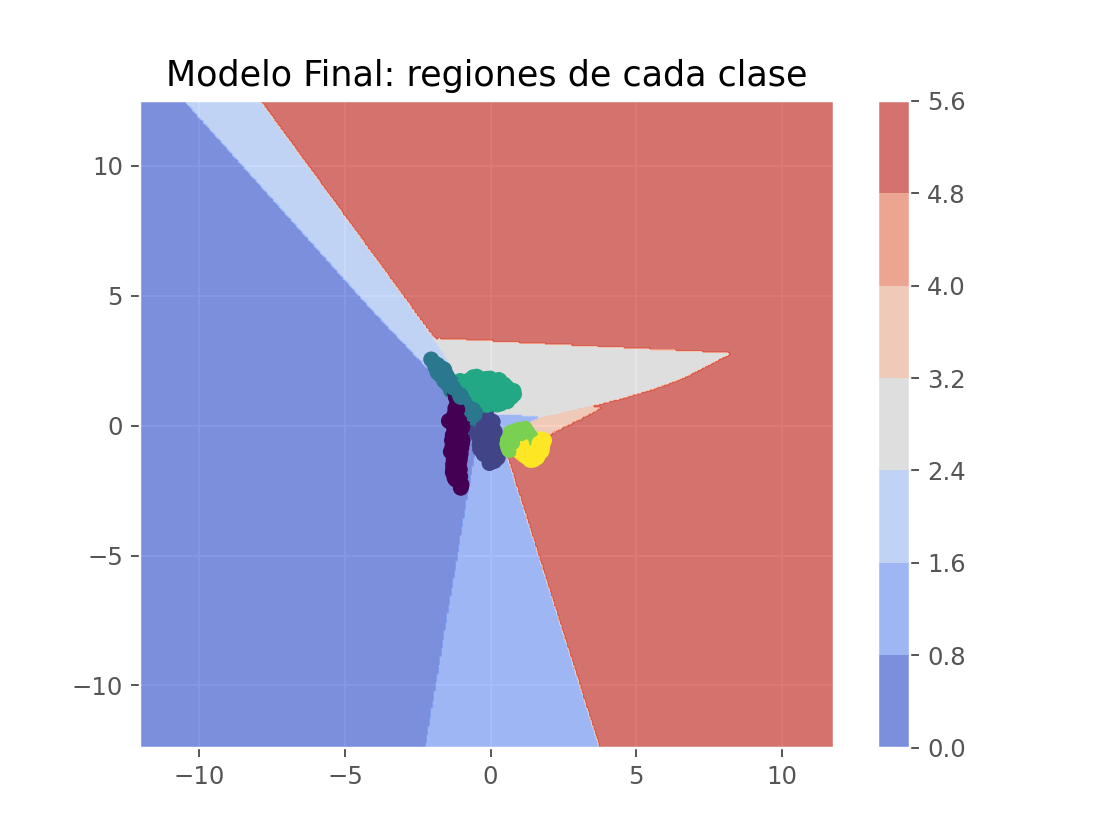

7454/7454 [==============================] - 3s 417us/step


In [35]:
# Creo un modelo Red Neuronal 
modelo = keras.Sequential([
    # input_shape solo en la primer capa
    
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3, input_shape=(d_in,), activation='relu'),

    # Capa con 5 salidas, activación tanh
    keras.layers.Dense(5, activation='tanh'),
    
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')
])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==2:
    rnutil.plot_fronteras_keras(modelo,x,y,title=f"Modelo inicial",detail=0.05)

modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.05), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
print("Entrenando....")
history = modelo.fit(x,y,epochs=100,batch_size=4,verbose=False)
rnutil.plot_loss_accuracy_keras(history)


# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
    rnutil.plot_fronteras_keras(modelo,x,y,title=f"Modelo Final",detail=0.05)

# Cálculo de métricas

In [37]:
y_pred = modelo.predict(x)
rnutil.print_classification_report(y,y_pred)
if classes == 2:
    rnutil.plot_tradeoff_curves(modelo,x,y)

47/47 [==============================] - 0s 460us/step
   Accuracy: 0.95    (1500 ejemplos)
